In [1]:
import numpy as np
import pandas as pd
import gzip
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

/opt/anaconda3/envs/idp_new/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../data/normalized_targeted_enzyme_activities.csv',index_col=0)
#columns = [col.split('-') for col in df.columns]
#df.columns = pd.MultiIndex.from_tuples(columns)
#df.mean(axis=1, level=0 )
wild_type = ['SF ABF93_1-R1', 'SF ABF93_1-R2','SF ABF93_1-R3']

df = df.drop(wild_type + ['SF ABF93_7-R3'],axis=1)
df

,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,SF ABF93_12-R2,SF ABF93_12-R3,SF ABF93_13-R1,...,SF ABF93_6-R2,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
r5a,0.995105,0.994377,0.993631,0.979098,0.985209,0.984702,0.995733,0.994480,1.000666,0.992161,...,0.985579,0.987115,0.998662,0.997664,0.996387,0.995655,0.993279,0.995492,0.987051,0.992847
r7,1.000738,0.993794,0.995286,0.992754,0.992586,0.991041,0.992991,0.996009,0.995802,0.995048,...,0.992739,0.996059,0.999702,0.995716,0.998108,0.998698,0.998650,0.998213,0.997526,0.996440
r8,1.000738,0.993794,0.995286,0.992754,0.992586,0.991041,0.992991,0.996009,0.995802,0.995048,...,0.992739,0.996059,0.999702,0.995716,0.998108,0.998698,0.998650,0.998213,0.997526,0.996440
r10,1.001089,0.997918,1.000740,1.003019,1.006957,1.003168,1.000069,0.994352,0.996800,0.996770,...,0.990238,0.994207,0.999827,0.999340,0.997180,0.992504,0.997890,1.002410,0.997120,1.001263
r12a,1.000294,0.997892,0.995880,0.999925,0.996575,0.996571,0.993787,0.999708,1.002830,1.004587,...,0.997948,0.995949,1.001273,1.003315,0.999491,0.999904,0.997986,0.999017,0.994048,0.995150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r2826,1.007364,1.003120,1.004994,1.005957,1.005965,1.000734,1.002633,1.002405,1.005644,1.002426,...,1.003572,1.002475,1.007147,1.001569,0.998879,0.998752,0.996746,1.003923,1.003966,1.005258
r2827,1.004796,1.003371,1.008273,1.007149,0.998202,1.000487,1.001341,0.998988,0.996441,0.991452,...,0.995779,0.998763,0.998830,0.999269,1.003906,1.003453,1.005372,1.004242,1.003499,1.006908
r2829,1.000476,1.003622,0.999772,1.002887,1.003213,1.002035,1.000671,0.997185,0.999111,0.999064,...,1.007207,1.004626,0.997863,0.998788,0.997189,0.999573,0.996613,1.005640,1.000875,0.998851
r2832,1.008546,1.005012,1.008186,1.012199,0.986134,0.990678,1.007402,1.010550,1.000911,0.989492,...,1.044413,1.056337,1.004343,1.000973,0.980271,0.986409,0.972198,1.009323,1.001247,1.002144


In [3]:
with gzip.open('../data/model_data.pz', 'rb') as f:
    data = pickle.load(f)

In [4]:
flux_3hp = data['vn']['EX_3hpp_e'].drop(wild_type)
flux_3hp

SF ABF93_10-R1     8.200368
SF ABF93_10-R2     9.273390
SF ABF93_10-R3     7.726842
SF ABF93_11-R1     5.896979
SF ABF93_11-R2     5.753339
SF ABF93_11-R3     5.833698
SF ABF93_12-R1     8.115986
SF ABF93_12-R2     9.805898
SF ABF93_12-R3     8.057465
SF ABF93_13-R1     6.485108
SF ABF93_13-R2     4.705283
SF ABF93_13-R3     6.913341
SF ABF93_14-R1     8.813734
SF ABF93_14-R2     8.217010
SF ABF93_14-R3    11.279952
SF ABF93_15-R1     9.203968
SF ABF93_15-R2     9.741029
SF ABF93_15-R3    10.610720
SF ABF93_16-R1     4.659546
SF ABF93_16-R2     6.370191
SF ABF93_16-R3     5.313049
SF ABF93_17-R1     4.997250
SF ABF93_17-R2     4.958145
SF ABF93_17-R3     4.579871
SF ABF93_2-R1      2.091163
SF ABF93_2-R2      4.184230
SF ABF93_2-R3      3.618712
SF ABF93_3-R1      3.858735
SF ABF93_3-R2      3.867200
SF ABF93_3-R3      4.762692
SF ABF93_4-R1      5.599254
SF ABF93_4-R2      5.747141
SF ABF93_4-R3      6.731556
SF ABF93_5-R1      9.278058
SF ABF93_5-R2      9.493726
SF ABF93_5-R3      9

In [6]:
# Issue with names in "df"

grouped = df.join(df['Assay Name'].str.extract(
    '^(?P<strain>[^-]+)-(?P<replicate>R\d+)')).groupby(['strain', 'GeneSymbol']).mean().reset_index().pivot_table(
    values='Value', index=['strain', 'media'], columns='GeneSymbol'
    ).drop('WT').dropna(axis=1)

KeyError: 'Assay Name'

In [5]:
corrs = df.corrwith(flux_3hp, axis=1).sort_values().fillna(0)
corrs = corrs.sort_values()

In [6]:
flux_3hp

SF ABF93_10-R1     8.200368
SF ABF93_10-R2     9.273390
SF ABF93_10-R3     7.726842
SF ABF93_11-R1     5.896979
SF ABF93_11-R2     5.753339
SF ABF93_11-R3     5.833698
SF ABF93_12-R1     8.115986
SF ABF93_12-R2     9.805898
SF ABF93_12-R3     8.057465
SF ABF93_13-R1     6.485108
SF ABF93_13-R2     4.705283
SF ABF93_13-R3     6.913341
SF ABF93_14-R1     8.813734
SF ABF93_14-R2     8.217010
SF ABF93_14-R3    11.279952
SF ABF93_15-R1     9.203968
SF ABF93_15-R2     9.741029
SF ABF93_15-R3    10.610720
SF ABF93_16-R1     4.659546
SF ABF93_16-R2     6.370191
SF ABF93_16-R3     5.313049
SF ABF93_17-R1     4.997250
SF ABF93_17-R2     4.958145
SF ABF93_17-R3     4.579871
SF ABF93_2-R1      2.091163
SF ABF93_2-R2      4.184230
SF ABF93_2-R3      3.618712
SF ABF93_3-R1      3.858735
SF ABF93_3-R2      3.867200
SF ABF93_3-R3      4.762692
SF ABF93_4-R1      5.599254
SF ABF93_4-R2      5.747141
SF ABF93_4-R3      6.731556
SF ABF93_5-R1      9.278058
SF ABF93_5-R2      9.493726
SF ABF93_5-R3      9

In [7]:
flux_3hp.shape

(47,)

In [8]:
len(df.loc[corrs.index[-1]].index)

47

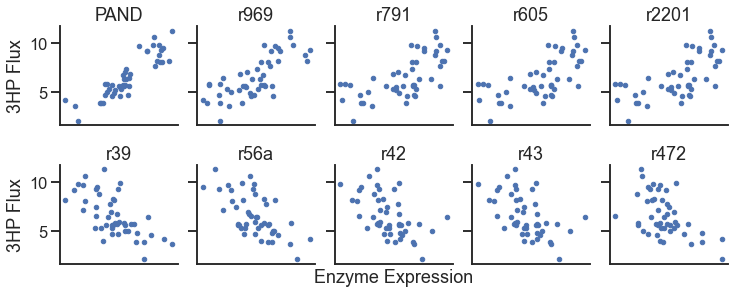

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10,4), sharey=True)

for i, ax in enumerate(axs[0], start=1):
    ax.plot(df.loc[corrs.index[-i]], flux_3hp, '.')
    ax.set_title(corrs.index[-i])
    ax.xaxis.set_ticks([])
    
for i, ax in enumerate(axs[1]):
    ax.plot(df.loc[corrs.index[i]], flux_3hp, '.')
    ax.set_title(corrs.index[i])
    ax.xaxis.set_ticks([])

plt.tight_layout()
sns.despine()

axs[1, 2].set_xlabel('Enzyme Expression')
axs[0,0].set_ylabel('3HP Flux')
axs[1,0].set_ylabel('3HP Flux')

plt.savefig('../figures/A.niger_correlation.svg')

In [10]:
axs[1]

array([<AxesSubplot:title={'center':'r39'}, ylabel='3HP Flux'>,
       <AxesSubplot:title={'center':'r56a'}>,
       <AxesSubplot:title={'center':'r42'}, xlabel='Enzyme Expression'>,
       <AxesSubplot:title={'center':'r43'}>,
       <AxesSubplot:title={'center':'r472'}>], dtype=object)

In [11]:
plt.plot(grouped['ureG'], data['vn']['DM_ccmuac_c'], '.')

NameError: name 'grouped' is not defined